<a href="https://colab.research.google.com/github/rz-pb/Bioinformatics-Codes/blob/main/Copy_of_Bioinformatics_Take_Home_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import itertools
np.set_printoptions(linewidth=200)

# Problem 4.2
Consider partial digest $ L = \{1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 9, 9, 10, 11, 12, 15\}$ . Solve the __Partial Digest problem__ for $L$ (i.e., find $X$ such that $\Delta X = L$).

## Answer
<img src = "https://drive.google.com/uc?id=1mII21UnzlKSZKts5pTeoskY9ce-afXj8" >

# Problem 4.8
Find a set $\Delta X$ with the smallest number of elements that could have arisen from more than one $X$, not counting _shifts and reflections_.

## Answer

<img src = "https://drive.google.com/uc?id=1rmlD2PStJZfACxdtP-1nmJMahjcCzsZK" >

<img src = "https://drive.google.com/uc?id=1fRyelOuEw0PAkuS8kjRM6ANrPtRpcESZ" >

# Problem 4.9

Devise a brute force algorithm for the __DDP__ and suggest a branch-and-bound approach to improve its performance.

## Answer
<img src = "https://drive.google.com/uc?id=1YrXV1qlchu-tirkgUUAK025LKrmyjmE1" >

## Double Digest Problem

<p align = "justify"><i>Double Digest mapping</i> is a restriction mapping technique that is even simpler (experimentally) than a partial digest but uses two different restriction enzymes. In this approach, biologists digest DNA in such a way that only fragments between <u>consecutive</u> sites are formed. One way to construct a double digest map is to measure the fragment lengths (but not the order) from a complete digestion of the DNA by each of the two enzymes singly, and then by the two enzymes applied together. The problem of determining the positions of the cuts from fragment length data is known as the <i>Double Digest problem</i>, or <b>DDP</b>.</p>

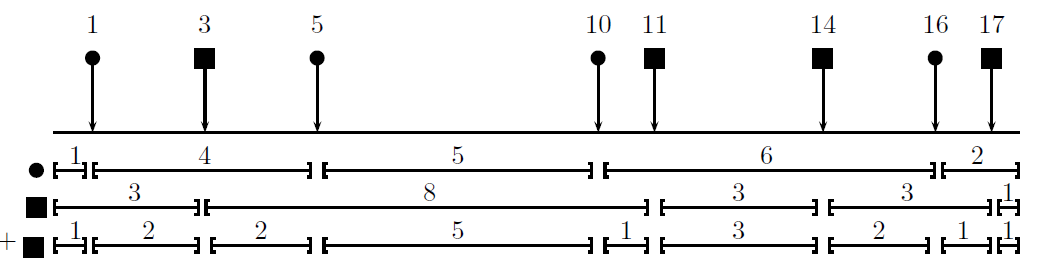



In [2]:
# Fragment lengths' lists

# Enzyme A applied 
DA = [6, 5, 4, 1, 2]

# Enzyme B applied
DB = [3, 8, 3, 1, 3]

# Both Enzymes A and B applied
DC = [1, 2, 2, 5, 1, 3, 2, 1, 1]

### Preliminary Functions 

In [3]:
# Functon for constructing a fragment length list based on restriction enzyme
# cutting sites 

def Consecutive_Difference(A) :
  A = list(A)
  A.sort()
  Cons_Diff = []
  for i in range (1,len(A)) :
    Cons_Diff.append(A[i] - A[i-1])

  return Cons_Diff


In [4]:
# Function for reconstructing the restriction enzyme cutting sites based on
# an ordered list of fragment lenghs

def Reconst_BasedOn_Ordered_Diff(DA) :
  A = []
  A.append(0)
  
  temp = 0
  for i in range(0,len(DA)) :
    temp += DA[i]
    A.append(temp)

  return A


### Brute Force Approach

In [5]:
# Function to DDP using a brute-force approach. It returns the location of 
# restriction enzyme sites (if any) for A and B, otherwise it returns a pair of
# empy lists indicating "not found!"

def BruteForce_DDP(DA,DB,DC) :

  DA_permlist = list(list(elem) for  elem in itertools.permutations(DA))
  DB_permlist = list(list(elem) for  elem in itertools.permutations(DB))
  
  for DA_perm in DA_permlist :
    A_candidate = Reconst_BasedOn_Ordered_Diff(DA_perm)
    for DB_perm in DB_permlist :
      B_candidate = Reconst_BasedOn_Ordered_Diff(DB_perm)
      
      A_candidate_set = set(A_candidate)
      B_candidate_Set = set(B_candidate)
      A_union_B = list(A_candidate_set.union(B_candidate))

      if DC == Consecutive_Difference(A_union_B) : 
        return A_candidate , B_candidate

  return [] , []


In [6]:
BruteForce_DDP(DA,DB,DC)

([0, 1, 5, 10, 16, 18], [0, 3, 11, 14, 17, 18])

# Problem 4.13

Given a long text string $T$, one shorter pattern string $s$, and an integer $k$, find the first occurrence in $T$ of a string (if any) $s ^\prime $ such that $ d_H(s, s^\prime) \le k$.
<br>
 note: $ d_H(s_1,s_2) $ is the _Hamming distance_ between strings $s_1$ and $s_2$. In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different.

## Answer

<img src = "https://drive.google.com/uc?id=1kxsrObYou0nHuzq1IN5VZ4rjtzyik317" >

## $k$-Approximation String Find Function

In [7]:
#sample text
T = "CACCCTAAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAAACCCTAACCCT"    

# sample patterns
s1 = "CCCCCC"                                                                   
s2 = "AACCCCT"

# criteria
k = 0                                                                           

In [8]:
def K_Approx_Find(T,s,k) :
  
  T_temp = T

  n = len(T)
  l = len(s)

  for i in range(0,n-l+1):
    
    distance = 0
    
    for j in range(0,l) :
      if s[j] != T[i+j] :
        distance += 1

    if distance <= k :
      T_temp = T_temp[0:i] + "[" + T_temp[i:i+l] + "]" + T_temp[i+l:]
      return (i , T_temp)

  return ("not found", T_temp)

In [9]:
K_Approx_Find(T,s1,k)

('not found',
 'CACCCTAAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAAACCCTAACCCT')

In [10]:
myindex , mystring = K_Approx_Find(T,s2,k)

In [11]:
mystring

'CACCCTAAACCCT[AACCCCT]AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAAACCCTAACCCT'

In [12]:
myindex

13

# Problem 6.20

Consider the sequences v = TACGGGTAT and w = GGACGTACG. Assume that the
match premium is +1 and that the mismatch and indel penalties are −1.

## Part 1
Fill out the dynamic programming table for a __global alignment__ between v and w.
Draw arrows in the cells to store the backtrack information. What is the score of
the optimal global alignment and what alignment does this score correspond to?


### Answer

<img src = "https://drive.google.com/uc?id=1jjXRy1t4SSdOfuOA5oBKEaGZZm1Op0LV" >
<img src = "https://drive.google.com/uc?id=1VzzTPJyluEwCG5JzlcZgoDVm1vWJ1A3v" >

### Global Pairwise Sequence Alignment (DP - Bottom-up)

In [13]:
# Gap Penalty
d = 1

# Scoring Matrix
Scoring_Matrix = np.array([[ 1,    -1,      -1,     -1],
                           [-1,     1,      -1,     -1],
                           [-1,    -1,       1,     -1],
                           [-1,    -1,      -1,      1]])

In [14]:
def Score(v,u,Score_Matrix) :
  
  Residue_Index = {'A' : 0 , 'C' : 1 , 'G' : 2 , 'T' : 3}
  return Score_Matrix[Residue_Index[v],Residue_Index[u]]

In [15]:
def GPSA_DP_tables(X,Y) :
  
  GPSA_BU_table_temp = np.full((len(Y)+1,len(X)+1), -1)

  GPSA_BU_operations_table_temp = (len(Y)+1)*(len(X)+1)*["E"]
  GPSA_BU_operations_table_temp = np.array(GPSA_BU_operations_table_temp , dtype=str)
  GPSA_BU_operations_table_temp = np.reshape(GPSA_BU_operations_table_temp,(len(Y)+1,len(X)+1))

  return (GPSA_BU_table_temp , GPSA_BU_operations_table_temp) 

In [16]:
def GPSA_DP_BU(X,Y,S,d) :


  GPSA_BU_table , GPSA_BU_operations_table = GPSA_DP_tables(X,Y)
  
  

  for i in range(0,len(Y)+1) :
    for j in range(0,len(X)+1) :
      
      if i == 0 and j == 0 :
        GPSA_BU_table[i,j] = 0
        GPSA_BU_operations_table[i,j] = "N"

      if i == 0 and j != 0 :
        GPSA_BU_table[i,j] = -1 * j * d
        GPSA_BU_operations_table[i,j] = "D"   # DELETE
      
      if j == 0 and i != 0 :
        GPSA_BU_table[i,j] = -1 * i * d
        GPSA_BU_operations_table[i,j] = "I"   # INSERT


      
      if i > 0 and j > 0 :


          GPSA_BU_table[i,j] = max( GPSA_BU_table[i-1,j-1] + Score(X[j-1],Y[i-1],S) , GPSA_BU_table[i,j-1] - d , GPSA_BU_table[i-1,j] - d )
          
          if GPSA_BU_table[i,j] == GPSA_BU_table[i-1,j-1] + Score(X[j-1],Y[i-1],S) :
            GPSA_BU_operations_table[i,j] = "S" # SUBSTITUTION

          if GPSA_BU_table[i,j] == GPSA_BU_table[i,j-1] - d :
            GPSA_BU_operations_table[i,j] = "D" # DELETE

          if GPSA_BU_table[i,j] == GPSA_BU_table[i-1,j] - d :
            GPSA_BU_operations_table[i,j] = "I" # INSERT
            

  return (GPSA_BU_table , GPSA_BU_operations_table , GPSA_BU_table[-1,-1])

In [17]:
V = "TACGGGTAT"
W = "GGACGTACG"

In [18]:
global_optimal_value_table , global_optimal_solution_table ,global_optimal_value = GPSA_DP_BU(V,W,Scoring_Matrix,d)

In [19]:
global_optimal_value_table

array([[ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9],
       [-1, -1, -2, -3, -2, -3, -4, -5, -6, -7],
       [-2, -2, -2, -3, -2, -1, -2, -3, -4, -5],
       [-3, -3, -1, -2, -3, -2, -2, -3, -2, -3],
       [-4, -4, -2,  0, -1, -2, -3, -3, -3, -3],
       [-5, -5, -3, -1,  1,  0, -1, -2, -3, -4],
       [-6, -4, -4, -2,  0,  0, -1,  0, -1, -2],
       [-7, -5, -3, -3, -1, -1, -1, -1,  1,  0],
       [-8, -6, -4, -2, -2, -2, -2, -2,  0,  0],
       [-9, -7, -5, -3, -1, -1, -1, -2, -1, -1]])

In [20]:
global_optimal_solution_table

array([['N', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
       ['I', 'S', 'D', 'D', 'S', 'D', 'D', 'D', 'D', 'D'],
       ['I', 'I', 'S', 'D', 'S', 'S', 'D', 'D', 'D', 'D'],
       ['I', 'I', 'S', 'D', 'I', 'I', 'S', 'D', 'S', 'D'],
       ['I', 'I', 'I', 'S', 'D', 'D', 'I', 'S', 'I', 'S'],
       ['I', 'I', 'I', 'I', 'S', 'D', 'D', 'D', 'D', 'I'],
       ['I', 'S', 'I', 'I', 'I', 'S', 'D', 'S', 'D', 'D'],
       ['I', 'I', 'S', 'I', 'I', 'I', 'S', 'I', 'S', 'D'],
       ['I', 'I', 'I', 'S', 'I', 'I', 'I', 'I', 'I', 'S'],
       ['I', 'I', 'I', 'I', 'S', 'S', 'S', 'D', 'I', 'I']], dtype='<U1')

In [21]:
global_optimal_value

-1

## Part 2
Fill out the dynamic programming table for a __local alignment__ between v and w.
Draw arrows in the cells to store the backtrack information. What is the score of
the optimal local alignment in this case and what alignment achieves this score?

### Answer

<img src = "https://drive.google.com/uc?id=1J6Z2aZrjHlPkmUx9zq6XQxbJjz8RV3Ej" >
<img src = "https://drive.google.com/uc?id=1MhtOlhiB3HTD7eT0PhfNHFM525u0-qnq" >

### Local Pairwise Sequence Alignment

In [22]:
def LPSA_DP_tables(X,Y) :
  
  LPSA_BU_table_temp = np.full((len(Y)+1,len(X)+1), -1)

  LPSA_BU_operations_table_temp = (len(Y)+1)*(len(X)+1)*["E"]
  LPSA_BU_operations_table_temp = np.array(LPSA_BU_operations_table_temp , dtype=str)
  LPSA_BU_operations_table_temp = np.reshape(LPSA_BU_operations_table_temp,(len(Y)+1,len(X)+1))

  return (LPSA_BU_table_temp , LPSA_BU_operations_table_temp) 

In [23]:
def LPSA_DP_BU(X,Y,S,d) :


  LPSA_BU_table , LPSA_BU_operations_table = LPSA_DP_tables(X,Y)
  
  

  for i in range(0,len(Y)+1) :
    for j in range(0,len(X)+1) :
      
      if i == 0 and j == 0 :
        LPSA_BU_table[i,j] = 0
        LPSA_BU_operations_table[i,j] = "N"

      if i == 0 and j != 0 :
        LPSA_BU_table[i,j] = max(0 , -1 * j * d)
        
        if LPSA_BU_table[i,j] == -1 * j * d :
          LPSA_BU_operations_table[i,j] = "D"   # DELETE

        if LPSA_BU_table[i,j] == 0 :
          LPSA_BU_operations_table[i,j] = "N" # NONE

      
      if j == 0 and i != 0 :
        LPSA_BU_table[i,j] = max(0 , -1 * i * d)
        
        if LPSA_BU_table[i,j] == -1 * i * d :
          LPSA_BU_operations_table[i,j] = "I"   # INSERT

        if LPSA_BU_table[i,j] == 0 :
          LPSA_BU_operations_table[i,j] = "N" # NONE  


      
      if i > 0 and j > 0 :


          LPSA_BU_table[i,j] = max( 0 , LPSA_BU_table[i-1,j-1] + Score(X[j-1],Y[i-1],S) , LPSA_BU_table[i,j-1] - d , LPSA_BU_table[i-1,j] - d )
          
          if LPSA_BU_table[i,j] == LPSA_BU_table[i-1,j-1] + Score(X[j-1],Y[i-1],S) :
            LPSA_BU_operations_table[i,j] = "S" # SUBSTITUTION

          if LPSA_BU_table[i,j] == LPSA_BU_table[i,j-1] - d :
            LPSA_BU_operations_table[i,j] = "D" # DELETE

          if LPSA_BU_table[i,j] == LPSA_BU_table[i-1,j] - d :
            LPSA_BU_operations_table[i,j] = "I" # INSERT

          if LPSA_BU_table[i,j] == 0 :
            LPSA_BU_operations_table[i,j] = "N" # NONE

            

  return (LPSA_BU_table , LPSA_BU_operations_table , LPSA_BU_table.max())

In [24]:
local_optimal_value_table , local_optimal_solution_table ,local_optimal_value = LPSA_DP_BU(V,W,Scoring_Matrix,d)

In [25]:
local_optimal_value_table

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 2, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 2, 1],
       [0, 0, 0, 2, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 3, 2, 1, 0, 0, 0],
       [0, 1, 0, 0, 2, 2, 1, 2, 1, 1],
       [0, 0, 2, 1, 1, 1, 1, 1, 3, 2],
       [0, 0, 1, 3, 2, 1, 0, 0, 2, 2],
       [0, 0, 0, 2, 4, 3, 2, 1, 1, 1]])

In [26]:
local_optimal_solution_table

array([['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'],
       ['N', 'N', 'N', 'N', 'S', 'S', 'S', 'N', 'N', 'N'],
       ['N', 'N', 'N', 'N', 'S', 'S', 'S', 'D', 'N', 'N'],
       ['N', 'N', 'S', 'N', 'N', 'I', 'I', 'S', 'S', 'D'],
       ['N', 'N', 'N', 'S', 'D', 'N', 'N', 'N', 'I', 'S'],
       ['N', 'N', 'N', 'I', 'S', 'D', 'D', 'N', 'N', 'N'],
       ['N', 'S', 'N', 'N', 'I', 'S', 'D', 'S', 'D', 'S'],
       ['N', 'N', 'S', 'D', 'I', 'I', 'S', 'I', 'S', 'D'],
       ['N', 'N', 'I', 'S', 'D', 'D', 'N', 'N', 'I', 'S'],
       ['N', 'N', 'N', 'I', 'S', 'D', 'D', 'D', 'I', 'I']], dtype='<U1')

In [27]:
local_optimal_value

4

## Part 3
Suppose we use an affine gap penalty where it costs −20 to open a gap, and −1 to extend it. Scores of matches and mismatches are unchanged. What is the optimal global alignment in this case and what score does it achieve?


### Answer

<img src = "https://drive.google.com/uc?id=1ydno86qhEju2LnJdqiYr4DP-1Y1EVeuW" >
<img src = "https://drive.google.com/uc?id=1JC2Pv6QRdBpx2Dkzo1mBprbS8w16mlo3" >

# Problem 6.21

For a pair of strings $ v = v_1 . . . v_n$ and $w = w_1 . . .w_m$, define $M(v,w)$ to be the matrix whose $(i, j)$th entry is the score of the _optimal global alignment_ which aligns the character $v_i$ with the character $w_j$ . Give an $O(nm)$ algorithm which computes $M(v,w)$.

## Answer

<img src = "https://drive.google.com/uc?id=1LoCCyNz1780NCQi6jtPsJ1wxPPMrVOB2" >

In [28]:
def M(V,W,S) : 
  
  (GPSA , _ , _) = GPSA_DP_BU(V,W,S,d)

  V_R = list(V)
  V_R.reverse()
  v_R = "".join(V_R)

  W_R = list(W)
  W_R.reverse()
  W_R = "".join(W_R)
  
  (GPSA_reverse , _ , _) = GPSA_DP_BU(V_R,W_R,S,d)

  # M_BU_table , M_BU_operations_table = DP_tables(V,W)
  M_BU_table = np.full((len(W),len(V)), -1)
  for i in range(1,len(W)+1) :
    for j in range(1,len(V)+1):
      M_BU_table[i-1,j-1] = GPSA[j-1,i-1] + Score(V[j-1],W[i-1],S) + GPSA_reverse[len(V)-j,len(W)-i]

  return M_BU_table    
      

In [29]:
M("AC","CG",Scoring_Matrix)

array([[-2, -1],
       [-3, -2]])

# Problem 6.23
Give an algorithm which computes the optimal fitting alignment. Explain how to fill in the first row and column of the _dynamic programming table_ and give a _recurrence_ to fill in the rest of the table. Give a method to find the best alignment once the table is filled in. The algorithm should run in time $O(nm)$.

## Answer

<img src = "https://drive.google.com/uc?id=1cWMU_zB3c1M0xzctuhI8qeORte32lyG_" >

# Problem 6.24

Devise an efficient algorithm for the __Semiglobal Alignment problem__ and illustrate its work on the sequences ACAGATA and AGT. For scoring, use the match premium +1,mismatch penalty −1, and indel penalty −1.

## Answer

<img src = "https://drive.google.com/uc?id=1HpUF_J1kwXRwgFsGl50ZL1rtnaX5eivZ" >

<img src = "https://drive.google.com/uc?id=1EUYI_sczJHI9VTCX6tZZy2vtz3EL-vFG" >

## SemiGlobal Pairwise Sequence Alignment

In [30]:
def SPGA_DP_tables(X,Y) :
  
  SGPSA_BU_table_temp = np.full((len(Y)+1,len(X)+1), -1)

  SGPSA_BU_operations_table_temp = (len(Y)+1)*(len(X)+1)*["E"]
  SGPSA_BU_operations_table_temp = np.array(SGPSA_BU_operations_table_temp , dtype=str)
  SGPSA_BU_operations_table_temp = np.reshape(SGPSA_BU_operations_table_temp,(len(Y)+1,len(X)+1))

  return (SGPSA_BU_table_temp , SGPSA_BU_operations_table_temp) 

In [31]:
def SGPSA_DP_BU(X,Y,S,d) :


  SGPSA_BU_table , SGPSA_BU_operations_table = SPGA_DP_tables(X,Y)
  
  

  for i in range(0,len(Y)+1) :
    for j in range(0,len(X)+1) :
      
      if i == 0 and j == 0 :
        SGPSA_BU_table[i,j] = 0
        SGPSA_BU_operations_table[i,j] = "N"

      if i == 0 and j != 0 :
        SGPSA_BU_table[i,j] = 0
        SGPSA_BU_operations_table[i,j] = "D"   # DELETE
      
      if j == 0 and i != 0 :
        SGPSA_BU_table[i,j] = 0
        SGPSA_BU_operations_table[i,j] = "I"   # INSERT


      
      if i > 0 and j > 0 :


          SGPSA_BU_table[i,j] = max( SGPSA_BU_table[i-1,j-1] + Score(X[j-1],Y[i-1],S) , SGPSA_BU_table[i,j-1] - d , SGPSA_BU_table[i-1,j] - d )
          
          if SGPSA_BU_table[i,j] == SGPSA_BU_table[i-1,j-1] + Score(X[j-1],Y[i-1],S) :
            SGPSA_BU_operations_table[i,j] = "S" # SUBSTITUTION

          if SGPSA_BU_table[i,j] == SGPSA_BU_table[i,j-1] - d :
            SGPSA_BU_operations_table[i,j] = "D" # DELETE

          if SGPSA_BU_table[i,j] == SGPSA_BU_table[i-1,j] - d :
            SGPSA_BU_operations_table[i,j] = "I" # INSERT
            

  return (SGPSA_BU_table , SGPSA_BU_operations_table , max(SGPSA_BU_table[-1,:]))

In [32]:
V = "ACAGATA"
W = "AGT"

In [33]:
optimal_value_table , optimal_solution_table ,global_optimal_value = SGPSA_DP_BU(V,W,Scoring_Matrix,d)

In [34]:
optimal_value_table

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  2,  1,  0,  0],
       [ 0, -1, -1, -1,  1,  1,  2,  1]])

In [35]:
optimal_solution_table

array([['N', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
       ['I', 'S', 'D', 'S', 'D', 'S', 'D', 'S'],
       ['I', 'I', 'S', 'I', 'S', 'D', 'D', 'I'],
       ['I', 'I', 'I', 'I', 'I', 'S', 'S', 'D']], dtype='<U1')

In [36]:
global_optimal_value

2

# Problem 6.26

Substrings $v_i, . . . , v_{i+k}$ and $v_{i'} , . . . , v_{i'+k}$ of the string $v_1, . . . , v_n$ form a substring pair if $i'−i+k > MinGap$, where $MinGap$ is a parameter. Define the substring pair score as the (global) alignment score of $v_i, . . . , v_{i+k}$ and $v_i' , . . . , v_{i'+k}$. Design an algorithm that finds a substring pair with maximum score.

## Answer

<img src = "https://drive.google.com/uc?id=" >

# Problem 6.28

Given a _non-degenerate_ string, $v$, and a _degenerate_ string $w$ that contains $k$ __N__s, devise a method to find the best interpretation of $w$ according to $v$. That is, out of all $4k$ possible interpretations of $w$, find $w'$ with the minimum alignment score $s(w', v)$.

## Answer

<img src = "https://drive.google.com/uc?id=1XlpMZIyLOtDNAJxNqsbJmv8VfV3EGyjP" >

# Problem 6.30
Given two strings $v_1$ and $v_2$, explain how to construct a string $w$ minimizing
<br><br>
$|d(v_1,w) − d(v_2,w)|$
<br><br>
such that
$d(v_1,w) + d(v_2,w) = d(v_1, v_2)$.
<br><br>
$d(·, ·)$ is the edit distance between two strings.

## Answer

<img src = "https://drive.google.com/uc?id=1_shl3Y-gs9dSuC_pEvdKao2QPMfo8BC9" >

# Problem 6.33
Devise a faster algorithm for solving the __tandem repeat problem__.

## Answer

<img src = "https://drive.google.com/uc?id=" >

# Problem 6.35
<html>
<p>Use figure 6.29 to answer the following questions:
<ul>
<li>How many exons are in the human $\beta$-globulin gene?</li>
<li>The dot matrix in figure 6.29 (top) is between the mouse and human genes (i.e.,all introns and exons are present). Do you think the number of exons in the $\beta$-globulin gene is different in the human genome as compared to the mouse genome?</li>
<li>Label segments of the axes of the human and mouse genes in figure 6.29 to show where the introns and exons would be located.</li>

<br>

<img src = "https://drive.google.com/uc?id=1tV-2vwkzEP4xxS4CgoUC35mqA1uNX5M4" >


## Answer

<img src = "https://drive.google.com/uc?id=1EelzGFB6vGLAnWOjVliywAhw2bYOc3nN" >

# Problem 6.36

Devise an algorithm for the __Optimal Inexact Repeat problem__.

## Answer

<img src = "https://drive.google.com/uc?id=" >

# Tree-guided Multipe Alignment 


<img src = "https://drive.google.com/uc?id=1niJwOYuiRT__3KM9SBUy7IOuZUg8LdnR" >


## Answer

<img src = "https://drive.google.com/uc?id=" >

# Greedy Pairwise Alignment

<img src = "https://drive.google.com/uc?id=1oP6NrDXOWB9oWKDbmaBtMbQUXWhqltNr" >

## Answer

<img src = "https://drive.google.com/uc?id=" >